In [2]:
##### SCIKIT-LEARN or SKLEARN #####
#
#  - Python Machine Learning Module
#  - Simple and efficient tools for data mining and data analysis
#  - Accessible to everybody, and reusable in various contexts
#  - Built on NumPy, SciPy, and matplotlib
#  - Open source, commercially usable - BSD license
#
# https://scikit-learn.org/stable/index.html
# https://scikit-learn.org/stable/user_guide.html 
# https://scikit-learn.org/stable/modules/classes.html
# https://scikit-learn.org/stable/auto_examples/

In [2]:
# The sklearn ML API is very consistent:
# 0) read data
# 1) explore data
# 2) preprocess data
# Note: typically for usupervised learning, we don't have labeled data, and therefore there is no train/test split in step 3
#     4) choose the model by importing the appropriate estiamtor class from sklearn [from sklearn import model]
#     5) instantiate the model with desired parameter values [ml=model()]
#     6) fit the model to the training data [ml.fit(X, y)]
# Note: typically for usupervised learning, we don't have labeled data, and therefore there is no model application to test data in step 7
# 8) evaluate model
# 9) deploy/use model

In [4]:
import pandas as pd
import numpy as np

In [5]:
##### KMeans Clustering
#
# https://scikit-learn.org/stable/modules/clustering.html
# https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#


[[-1.87814945  7.84977027]
 [ 0.72144399  4.08475018]
 [-2.09444099  8.20013319]
 ...
 [-1.1918868   8.16409386]
 [-1.23879472  7.79444294]
 [ 2.98006314  0.79058033]]
[3 0 3 2 1 0 0 1 0 0 3 1 2 3 1 2 2 3 0 1 0 3 1 1 1 2 1 1 1 2 1 0 3 2 3 0 3
 0 2 2 0 0 0 2 3 0 0 3 2 0 1 0 0 2 3 1 0 0 3 3 1 1 2 2 2 3 0 2 3 3 3 3 3 2
 0 3 0 3 2 1 0 0 0 2 1 0 0 0 2 2 3 2 2 3 3 3 2 2 0 0 1 2 0 1 0 2 0 3 2 1 0
 0 2 3 2 2 0 2 1 1 1 3 2 2 0 1 0 3 2 1 1 0 2 0 0 0 2 0 1 3 1 3 1 0 3 3 1 0
 3 3 1 0 0 0 2 0 0 0 1 2 3 1 0 0 0 0 3 3 0 1 2 1 1 1 2 1 2 1 1 0 2 0 2 0 0
 2 1 2 1 3 2 0 1 1 2 3 2 3 2 2 2 0 3 3 1 1 2 0 3 0 3 2 0 3 2 0 0 1 1 3 0 0
 0 3 0 0 0 2 3 3 0 2 0 0 2 1 2 1 1 2 0 2 1 1 3 3 3 3 3 3 0 2 3 2 2 1 2 0 3
 0 1 3 0 1 3 2 0 2 3 1 1 0 1 2 3 3 2 3 2 0 1 3 2 0 2 2 2 0 2 3 1 2 0 3 3 1
 3 1 0 3 1 3 3 2 2 3 0 0 1 0 0 0 3 1 2 0 2 1 0 3 0 3 1 2 2 0 3 1 3 1 3 1 3
 2 2 3 1 0 1 0 2 0 3 0 1 1 1 1 1 1 2 1 2 1 0 3 1 3 3 0 0 0 0 3 3 2 3 3 3 0
 3 1 2 3 2 1 2 0 3 3 3 0 2 1 1 1 3 3 2 3 1 3 1 3 2 3 3 1 1 0 3 2 3 2 2 1 0
 0 0 3 

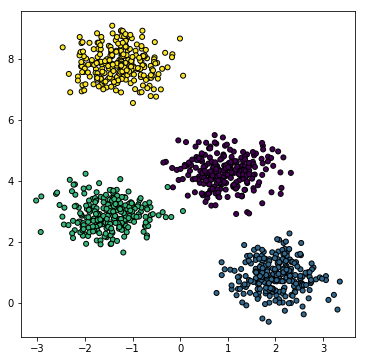

In [9]:
# 0) read data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=0.5, random_state=0)

print(X)
print(y)
# 1) explore data
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

# 2) preprocess data
# not demonstrating for this example

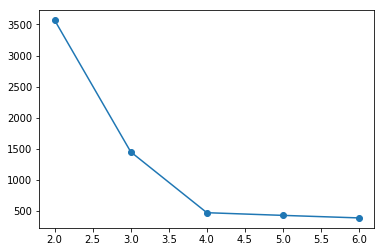

In [10]:
# Use the "elbow method" to pick an optimal k 
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
errorlst = pd.DataFrame(data=None, columns=['k','error'])
for k in range(2,7):
    km = KMeans(n_clusters=k)
    km.fit(X, y)
    #error = metrics.silhouette_score(X, km.labels_, metric='sqeuclidean') 
    error = km.inertia_
    errorlst = errorlst.append({'k':k, 'error':error}, ignore_index=True)
plt.plot (errorlst['k'], errorlst['error'], 'o-')

In [11]:
# import, instantiate, train, test model
from sklearn.cluster import KMeans                                                # 4) choose the model 
km = KMeans(n_clusters=4, random_state=0)                                  # 5) instantiate the model 
km.fit(X, y)                                                                                          # 6) fit the model to the training data

error = km.inertia_                                                                             # 8) evaluate the model
#error = metrics.silhouette_score(X, km.labels_, metric='sqeuclidean') 
print (error)

print (km.labels_)
print (km.cluster_centers_)

print (km.predict([[0,4]]))                                                                   # 9) deploy/use model

474.5630634519897
[0 3 0 2 1 3 3 1 3 3 0 1 2 0 1 2 2 0 3 1 3 0 1 1 1 2 1 1 1 2 1 3 0 2 0 3 0
 3 2 2 3 3 3 2 0 3 3 0 2 3 1 3 3 2 0 1 3 3 0 0 1 1 2 2 2 0 3 2 0 0 0 0 0 2
 3 0 3 0 2 1 3 3 3 2 1 3 3 3 2 2 0 2 2 0 0 0 2 2 3 3 1 2 3 1 3 2 3 0 2 1 3
 3 2 0 2 2 3 2 1 1 1 0 2 2 3 1 3 0 2 1 1 3 2 3 3 3 2 3 1 0 1 0 1 3 0 0 1 3
 0 0 1 3 3 3 2 3 3 3 1 2 0 1 3 3 3 3 0 0 3 1 2 1 1 1 2 1 2 1 1 3 2 3 2 3 3
 2 1 2 1 0 2 3 1 1 2 0 2 0 2 2 2 3 0 0 1 1 2 3 0 3 0 2 3 0 2 3 3 1 1 0 3 3
 3 0 3 3 3 2 0 0 3 2 3 3 2 1 2 1 1 2 3 2 1 1 0 0 0 0 0 0 3 2 0 2 2 1 2 3 0
 3 1 0 3 1 0 2 3 2 0 1 1 3 1 2 0 0 2 0 2 3 1 0 2 3 2 2 2 3 2 0 1 2 3 0 0 1
 0 1 3 0 1 0 0 2 2 0 3 3 1 3 3 3 0 1 2 3 2 1 3 0 3 0 1 2 2 3 0 1 0 1 0 1 0
 2 2 0 1 3 1 3 2 3 0 3 1 1 1 1 1 1 2 1 2 1 3 0 1 0 0 3 3 3 3 0 0 2 0 0 0 3
 0 1 2 0 2 1 2 3 0 0 0 3 2 1 1 1 0 0 2 0 1 0 1 0 2 0 0 1 1 3 0 2 0 2 2 1 3
 3 3 0 2 3 2 2 2 3 3 0 1 0 3 2 2 2 0 3 0 0 3 3 2 1 2 0 0 3 2 3 1 0 1 0 0 2
 2 3 1 3 3 3 2 0 3 2 0 1 2 1 0 1 3 1 3 0 0 1 2 0 0 1 3 2 3 3 3 3 3 1 2 3 2
 3 1 3 

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.0787

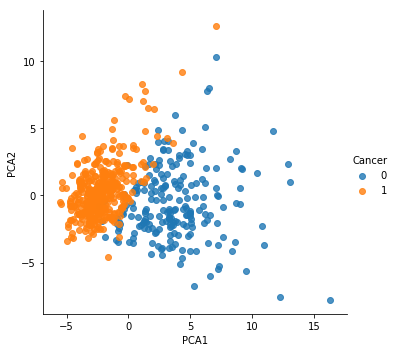

In [15]:
##### Principal Component Analysis
#
# https://scikit-learn.org/stable/modules/decomposition.html
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://scikit-learn.org/stable/modules/unsupervised_reduction.html
#

# load data
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['label'] = dataset.target
X = df.drop(['label'], axis=1)
y = df['label']
#df.head()
print(X.head())
# standardize feature data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
Xss = ss.fit_transform(X)

# find the first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xss)

# put the principal components and class labels in a dataframe
dfXpca = pd.DataFrame(data=Xpca, columns=['PCA1', 'PCA2'])
dfXpca['Cancer'] = y

print (pca.components_)
print(dfXpca.head())
# plot pricipal components and color-coded class labels
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.lmplot(data=dfXpca, x='PCA1', y='PCA2', hue='Cancer', fit_reg=False)